# **0. CONNECT TO GOOGLE DRIVE**

In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
ROOT_PATH = '/content/drive/MyDrive/Data Science/Rakamin/IDX Partners Virtual Internship'

# **1. LIBRARIES**

In [4]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.4/484.4 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 14.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.5/17.5 MB 74.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 74.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 65.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 83.3 MB/s eta 0:0

In [5]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter
from pycaret.classification import *
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import classification_report
from joblib import dump

In [6]:
pd.options.display.max_rows = None
pd.options.display.max_columns = None

# **2. READ DATA**

In [7]:
df = pd.read_csv(os.path.join(ROOT_PATH, 'loan_data_2007_2014.csv'))

In [8]:
df.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

# **3. DATA PREPROCESSING**

## 3.1. Duplicated Rows

Check for duplicated records.

In [10]:
df[df.duplicated()]

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m


No duplicated rows.

## 3.2. Check Null Values

### 3.2.1. All Null Values

Drop columns whose values are 100% null.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [12]:
all_null_columns = df.columns[df.isnull().all()]

print("Columns with all null values:")
print(all_null_columns)

Columns with all null values:
Index(['annual_inc_joint', 'dti_joint', 'verification_status_joint',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'inq_fi', 'total_cu_tl',
       'inq_last_12m'],
      dtype='object')


In [13]:
# drop

df = df.drop(columns=all_null_columns)

### 3.2.2. Partial Null Values

Drop values whose values >40% null.

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 58 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [15]:
cols = df.columns
perc_of_null = (df.isnull().sum()/len(df))*100

In [16]:
pd.DataFrame({
    "Columns": cols,
    "% of Null values": perc_of_null
})

,Columns,% of Null values
Unnamed: 0,Unnamed: 0,0.000000
id,id,0.000000
member_id,member_id,0.000000
loan_amnt,loan_amnt,0.000000
funded_amnt,funded_amnt,0.000000
funded_amnt_inv,funded_amnt_inv,0.000000
term,term,0.000000
int_rate,int_rate,0.000000
installment,installment,0.000000
grade,grade,0.000000


In [17]:
partial_null_columns = df.columns[(df.isnull().sum()/len(df))*100 > 40]

In [73]:
partial_null_columns

Index(['desc', 'mths_since_last_delinq', 'mths_since_last_record',
       'next_pymnt_d', 'mths_since_last_major_derog'],
      dtype='object')

In [18]:
# drop

df = df.drop(columns=partial_null_columns)

In [19]:
df.shape

(466285, 53)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 53 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Unnamed: 0                  466285 non-null  int64  
 1   id                          466285 non-null  int64  
 2   member_id                   466285 non-null  int64  
 3   loan_amnt                   466285 non-null  int64  
 4   funded_amnt                 466285 non-null  int64  
 5   funded_amnt_inv             466285 non-null  float64
 6   term                        466285 non-null  object 
 7   int_rate                    466285 non-null  float64
 8   installment                 466285 non-null  float64
 9   grade                       466285 non-null  object 
 10  sub_grade                   466285 non-null  object 
 11  emp_title                   438697 non-null  object 
 12  emp_length                  445277 non-null  object 
 13  home_ownership

## 3.3. Unnecessary Columns

In [21]:
df.nunique()

Unnamed: 0                    466285
id                            466285
member_id                     466285
loan_amnt                       1352
funded_amnt                     1354
funded_amnt_inv                 9854
term                               2
int_rate                         506
installment                    55622
grade                              7
sub_grade                         35
emp_title                     205475
emp_length                        11
home_ownership                     6
annual_inc                     31901
verification_status                3
issue_d                           91
loan_status                        9
pymnt_plan                         2
url                           466285
purpose                           14
title                          63099
zip_code                         888
addr_state                        50
dti                             3997
delinq_2yrs                       24
earliest_cr_line                 664
i



Unnecessacy Columns: `Unnamed: 0`, `id`, `member_id`, `url`, `policy_code`, `application_type`

In [22]:
unncss_cols = ['Unnamed: 0', 'id', 'member_id', 'url', 'policy_code', 'application_type']

In [23]:
# drop

df = df.drop(columns=unncss_cols)

In [24]:
df.shape

(466285, 47)

In [25]:
df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'pymnt_plan', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'acc_now_delinq', 'tot_coll_amt',
       'tot_cur_bal', 'total_rev_hi_lim'],
      dtype='object')

## 3.4. Fill in Null Values

In [26]:
cols_with_null = df.columns[df.isnull().any()]

### 3.4.1. Numerical Columns

In [27]:
null_num_cols = df[cols_with_null].select_dtypes(exclude='object').columns

In [28]:
null_num_cols

Index(['annual_inc', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_util', 'total_acc', 'collections_12_mths_ex_med',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim'],
      dtype='object')

In [29]:
df[null_num_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   annual_inc                  466281 non-null  float64
 1   delinq_2yrs                 466256 non-null  float64
 2   inq_last_6mths              466256 non-null  float64
 3   open_acc                    466256 non-null  float64
 4   pub_rec                     466256 non-null  float64
 5   revol_util                  465945 non-null  float64
 6   total_acc                   466256 non-null  float64
 7   collections_12_mths_ex_med  466140 non-null  float64
 8   acc_now_delinq              466256 non-null  float64
 9   tot_coll_amt                396009 non-null  float64
 10  tot_cur_bal                 396009 non-null  float64
 11  total_rev_hi_lim            396009 non-null  float64
dtypes: float64(12)
memory usage: 42.7 MB


In [30]:
for column in null_num_cols:
    median = df[column].median()
    df[column].fillna(median, inplace=True)

### 3.4.2. Non-numerical Columns

In [31]:
null_non_num_cols = df[cols_with_null].select_dtypes(include='object').columns

In [32]:
null_non_num_cols

Index(['emp_title', 'emp_length', 'title', 'earliest_cr_line', 'last_pymnt_d',
       'last_credit_pull_d'],
      dtype='object')

In [33]:
for column in null_non_num_cols:
    mode_value = df[column].mode()[0]
    df[column].fillna(mode_value, inplace=True)

In [34]:
df[null_non_num_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   emp_title           466285 non-null  object
 1   emp_length          466285 non-null  object
 2   title               466285 non-null  object
 3   earliest_cr_line    466285 non-null  object
 4   last_pymnt_d        466285 non-null  object
 5   last_credit_pull_d  466285 non-null  object
dtypes: object(6)
memory usage: 21.3+ MB


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 47 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amnt                   466285 non-null  int64  
 1   funded_amnt                 466285 non-null  int64  
 2   funded_amnt_inv             466285 non-null  float64
 3   term                        466285 non-null  object 
 4   int_rate                    466285 non-null  float64
 5   installment                 466285 non-null  float64
 6   grade                       466285 non-null  object 
 7   sub_grade                   466285 non-null  object 
 8   emp_title                   466285 non-null  object 
 9   emp_length                  466285 non-null  object 
 10  home_ownership              466285 non-null  object 
 11  annual_inc                  466285 non-null  float64
 12  verification_status         466285 non-null  object 
 13  issue_d       

## 3.5. Rearrange Columns

Rearrange columns based on alphabetical order.

In [36]:
df.sort_index(axis=1, inplace=True)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 47 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   acc_now_delinq              466285 non-null  float64
 1   addr_state                  466285 non-null  object 
 2   annual_inc                  466285 non-null  float64
 3   collection_recovery_fee     466285 non-null  float64
 4   collections_12_mths_ex_med  466285 non-null  float64
 5   delinq_2yrs                 466285 non-null  float64
 6   dti                         466285 non-null  float64
 7   earliest_cr_line            466285 non-null  object 
 8   emp_length                  466285 non-null  object 
 9   emp_title                   466285 non-null  object 
 10  funded_amnt                 466285 non-null  int64  
 11  funded_amnt_inv             466285 non-null  float64
 12  grade                       466285 non-null  object 
 13  home_ownership

In [38]:
df.columns

Index(['acc_now_delinq', 'addr_state', 'annual_inc', 'collection_recovery_fee',
       'collections_12_mths_ex_med', 'delinq_2yrs', 'dti', 'earliest_cr_line',
       'emp_length', 'emp_title', 'funded_amnt', 'funded_amnt_inv', 'grade',
       'home_ownership', 'initial_list_status', 'inq_last_6mths',
       'installment', 'int_rate', 'issue_d', 'last_credit_pull_d',
       'last_pymnt_amnt', 'last_pymnt_d', 'loan_amnt', 'loan_status',
       'open_acc', 'out_prncp', 'out_prncp_inv', 'pub_rec', 'purpose',
       'pymnt_plan', 'recoveries', 'revol_bal', 'revol_util', 'sub_grade',
       'term', 'title', 'tot_coll_amt', 'tot_cur_bal', 'total_acc',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_int', 'total_rec_late_fee',
       'total_rec_prncp', 'total_rev_hi_lim', 'verification_status',
       'zip_code'],
      dtype='object')

In [39]:
df.head()

,acc_now_delinq,addr_state,annual_inc,collection_recovery_fee,collections_12_mths_ex_med,delinq_2yrs,dti,earliest_cr_line,emp_length,emp_title,funded_amnt,funded_amnt_inv,grade,home_ownership,initial_list_status,inq_last_6mths,installment,int_rate,issue_d,last_credit_pull_d,last_pymnt_amnt,last_pymnt_d,loan_amnt,loan_status,open_acc,out_prncp,out_prncp_inv,pub_rec,purpose,pymnt_plan,recoveries,revol_bal,revol_util,sub_grade,term,title,tot_coll_amt,tot_cur_bal,total_acc,total_pymnt,total_pymnt_inv,total_rec_int,total_rec_late_fee,total_rec_prncp,total_rev_hi_lim,verification_status,zip_code
0,0.0,AZ,24000.0,0.00,0.0,0.0,27.65,Jan-85,10+ years,Teacher,5000,4975.0,B,RENT,f,1.0,162.87,10.65,Dec-11,Jan-16,171.62,Jan-15,5000,Fully Paid,3.0,0.0,0.0,0.0,credit_card,n,0.00,13648,83.7,B2,36 months,Computer,0.0,81539.0,9.0,5861.071414,5831.78,861.07,0.00,5000.00,22800.0,Verified,860xx
1,0.0,GA,30000.0,1.11,0.0,0.0,1.00,Apr-99,< 1 year,Ryder,2500,2500.0,C,RENT,f,5.0,59.83,15.27,Dec-11,Sep-13,119.66,Apr-13,2500,Charged Off,3.0,0.0,0.0,0.0,car,n,117.08,1687,9.4,C4,60 months,bike,0.0,81539.0,4.0,1008.710000,1008.71,435.17,0.00,456.46,22800.0,Source Verified,309xx
2,0.0,IL,12252.0,0.00,0.0,0.0,8.72,Nov-01,10+ years,Teacher,2400,2400.0,C,RENT,f,2.0,84.33,15.96,Dec-11,Jan-16,649.91,Jun-14,2400,Fully Paid,2.0,0.0,0.0,0.0,small_business,n,0.00,2956,98.5,C5,36 months,real estate business,0.0,81539.0,10.0,3003.653644,3003.65,603.65,0.00,2400.00,22800.0,Not Verified,606xx
3,0.0,CA,49200.0,0.00,0.0,0.0,20.00,Feb-96,10+ years,AIR RESOURCES BOARD,10000,10000.0,C,RENT,f,1.0,339.31,13.49,Dec-11,Jan-15,357.48,Jan-15,10000,Fully Paid,10.0,0.0,0.0,0.0,other,n,0.00,5598,21.0,C1,36 months,personel,0.0,81539.0,37.0,12226.302210,12226.30,2209.33,16.97,10000.00,22800.0,Source Verified,917xx
4,0.0,OR,80000.0,0.00,0.0,0.0,17.94,Jan-96,1 year,University Medical Group,3000,3000.0,B,RENT,f,0.0,67.79,12.69,Dec-11,Jan-16,67.79,Jan-16,3000,Current,15.0,766.9,766.9,0.0,other,n,0.00,27783,53.9,B5,60 months,Personal,0.0,81539.0,38.0,3242.170000,3242.17,1009.07,0.00,2233.10,22800.0,Source Verified,972xx


## 3.6. Selection

In [40]:
num_cols = df.select_dtypes(exclude='object').columns
non_num_cols = df.select_dtypes(include='object').columns

In [41]:
df[non_num_cols].head()

,addr_state,earliest_cr_line,emp_length,emp_title,grade,home_ownership,initial_list_status,issue_d,last_credit_pull_d,last_pymnt_d,loan_status,purpose,pymnt_plan,sub_grade,term,title,verification_status,zip_code
0,AZ,Jan-85,10+ years,Teacher,B,RENT,f,Dec-11,Jan-16,Jan-15,Fully Paid,credit_card,n,B2,36 months,Computer,Verified,860xx
1,GA,Apr-99,< 1 year,Ryder,C,RENT,f,Dec-11,Sep-13,Apr-13,Charged Off,car,n,C4,60 months,bike,Source Verified,309xx
2,IL,Nov-01,10+ years,Teacher,C,RENT,f,Dec-11,Jan-16,Jun-14,Fully Paid,small_business,n,C5,36 months,real estate business,Not Verified,606xx
3,CA,Feb-96,10+ years,AIR RESOURCES BOARD,C,RENT,f,Dec-11,Jan-15,Jan-15,Fully Paid,other,n,C1,36 months,personel,Source Verified,917xx
4,OR,Jan-96,1 year,University Medical Group,B,RENT,f,Dec-11,Jan-16,Jan-16,Current,other,n,B5,60 months,Personal,Source Verified,972xx


In [42]:
for col in non_num_cols:
  print(col)
  print(df[col].nunique())
  print('')

addr_state
50

earliest_cr_line
664

emp_length
11

emp_title
205475

grade
7

home_ownership
6

initial_list_status
2

issue_d
91

last_credit_pull_d
103

last_pymnt_d
98

loan_status
9

purpose
14

pymnt_plan
2

sub_grade
35

term
2

title
63099

verification_status
3

zip_code
888



### 3.6.1. Drop Columns with Long Text

We might want to drop non-numerical columns with high variations in its values, such as `emp_title` and `title`.

In [43]:
df = df.drop(columns=['emp_title','title'])

In [44]:
for col in non_num_cols:
  try:
    print(col)
    print(df[col].value_counts())
    print()
  except:
    pass

addr_state
CA    71450
NY    40242
TX    36439
FL    31637
IL    18612
NJ    18061
PA    16424
OH    15237
GA    14975
VA    14222
NC    12682
MI    11549
MA    11072
MD    10974
AZ    10712
WA    10517
CO     9739
MN     8158
MO     7508
CT     7204
IN     6525
NV     6519
TN     5984
OR     5949
WI     5911
AL     5853
SC     5583
LA     5489
KY     4438
KS     4190
OK     4117
AR     3488
UT     3428
NM     2588
HI     2487
WV     2412
NH     2232
RI     2050
DC     1426
MT     1396
DE     1272
AK     1251
MS     1226
WY     1128
SD      980
VT      905
IA       14
NE       14
ID       12
ME        4
Name: addr_state, dtype: int64

earliest_cr_line
Oct-00    3703
Aug-00    3597
Aug-01    3455
Oct-99    3406
Oct-01    3329
Nov-99    3323
Nov-00    3267
Sep-00    3256
Sep-99    3130
Aug-99    3126
Sep-01    3061
Oct-02    3016
Dec-99    2968
Dec-00    2951
Nov-98    2899
Dec-98    2883
Oct-98    2862
Aug-02    2851
Sep-02    2846
Jul-00    2835
May-01    2819
Jul-01    2798
Jan-01    

In [45]:
df.columns

Index(['acc_now_delinq', 'addr_state', 'annual_inc', 'collection_recovery_fee',
       'collections_12_mths_ex_med', 'delinq_2yrs', 'dti', 'earliest_cr_line',
       'emp_length', 'funded_amnt', 'funded_amnt_inv', 'grade',
       'home_ownership', 'initial_list_status', 'inq_last_6mths',
       'installment', 'int_rate', 'issue_d', 'last_credit_pull_d',
       'last_pymnt_amnt', 'last_pymnt_d', 'loan_amnt', 'loan_status',
       'open_acc', 'out_prncp', 'out_prncp_inv', 'pub_rec', 'purpose',
       'pymnt_plan', 'recoveries', 'revol_bal', 'revol_util', 'sub_grade',
       'term', 'tot_coll_amt', 'tot_cur_bal', 'total_acc', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_int', 'total_rec_late_fee',
       'total_rec_prncp', 'total_rev_hi_lim', 'verification_status',
       'zip_code'],
      dtype='object')

### 3.6.2. Drop Columns with Value from The Future

We might want to drop columns that require record from the future, such as `out_prncp`, `out_prncp_inv`, `recoveries`, `last_pymnt_d`, `last_pymnt_amnt`, `total_pymnt`, `total_pymnt_inv`,
`total_rec_prncp`, `total_rec_int`, `total_rec_late_fee`,
`collection_recovery_fee`, `funded_amnt`, `funded_amnt_inv`.

In [46]:
df = df.drop(columns=["out_prncp", "out_prncp_inv", "recoveries", "last_pymnt_d",
                      "last_pymnt_amnt", "total_pymnt", "total_pymnt_inv",
                      "total_rec_prncp", "total_rec_int", "total_rec_late_fee",
                      "collection_recovery_fee", "funded_amnt", "funded_amnt_inv"])

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 32 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   acc_now_delinq              466285 non-null  float64
 1   addr_state                  466285 non-null  object 
 2   annual_inc                  466285 non-null  float64
 3   collections_12_mths_ex_med  466285 non-null  float64
 4   delinq_2yrs                 466285 non-null  float64
 5   dti                         466285 non-null  float64
 6   earliest_cr_line            466285 non-null  object 
 7   emp_length                  466285 non-null  object 
 8   grade                       466285 non-null  object 
 9   home_ownership              466285 non-null  object 
 10  initial_list_status         466285 non-null  object 
 11  inq_last_6mths              466285 non-null  float64
 12  installment                 466285 non-null  float64
 13  int_rate      

`issue_d` and `last_credit_pull_d` might also require data from the future.

In [48]:
df = df.drop(columns=['issue_d','last_credit_pull_d'])

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 30 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   acc_now_delinq              466285 non-null  float64
 1   addr_state                  466285 non-null  object 
 2   annual_inc                  466285 non-null  float64
 3   collections_12_mths_ex_med  466285 non-null  float64
 4   delinq_2yrs                 466285 non-null  float64
 5   dti                         466285 non-null  float64
 6   earliest_cr_line            466285 non-null  object 
 7   emp_length                  466285 non-null  object 
 8   grade                       466285 non-null  object 
 9   home_ownership              466285 non-null  object 
 10  initial_list_status         466285 non-null  object 
 11  inq_last_6mths              466285 non-null  float64
 12  installment                 466285 non-null  float64
 13  int_rate      

## 3.7. Encode Non-numerical Column to Numerical Column

In [50]:
num = df.select_dtypes(exclude='object').columns
non_num = df.select_dtypes(include='object').columns

In [51]:
non_num

Index(['addr_state', 'earliest_cr_line', 'emp_length', 'grade',
       'home_ownership', 'initial_list_status', 'loan_status', 'purpose',
       'pymnt_plan', 'sub_grade', 'term', 'verification_status', 'zip_code'],
      dtype='object')

In [52]:
for col in non_num:
  print(col)
  print(df[col].unique())

addr_state
['AZ' 'GA' 'IL' 'CA' 'OR' 'NC' 'TX' 'VA' 'MO' 'CT' 'UT' 'FL' 'NY' 'PA'
 'MN' 'NJ' 'KY' 'OH' 'SC' 'RI' 'LA' 'MA' 'WA' 'WI' 'AL' 'CO' 'KS' 'NV'
 'AK' 'MD' 'WV' 'VT' 'MI' 'DC' 'SD' 'NH' 'AR' 'NM' 'MT' 'HI' 'WY' 'OK'
 'DE' 'MS' 'TN' 'IA' 'NE' 'ID' 'IN' 'ME']
earliest_cr_line
['Jan-85' 'Apr-99' 'Nov-01' 'Feb-96' 'Jan-96' 'Nov-04' 'Jul-05' 'Jan-07'
 'Apr-04' 'Sep-04' 'Jan-98' 'Oct-89' 'Jul-03' 'May-91' 'Sep-07' 'Oct-98'
 'Aug-93' 'Oct-03' 'Jan-01' 'Nov-97' 'Feb-83' 'Jul-85' 'Apr-03' 'Jun-01'
 'Feb-02' 'Aug-84' 'Nov-06' 'Dec-87' 'Nov-81' 'Feb-97' 'Apr-05' 'Oct-07'
 'Dec-00' 'Apr-07' 'Dec-01' 'Jan-03' 'Mar-94' 'Sep-98' 'Jun-04' 'Nov-95'
 'Jul-99' 'Jun-95' 'Sep-92' 'Jan-02' 'Apr-92' 'Oct-06' 'May-00' 'Dec-98'
 'Dec-04' 'Oct-00' 'May-02' 'May-06' 'Jul-02' 'Jul-06' 'May-97' 'Oct-05'
 'Apr-95' 'Oct-02' 'Jan-00' 'Apr-00' 'Dec-94' 'Sep-05' 'Dec-84' 'Dec-99'
 'Nov-03' 'Jun-89' 'Jun-03' 'Oct-96' 'May-03' 'Jun-02' 'Jun-07' 'Dec-96'
 'Feb-84' 'Sep-02' 'Jan-86' 'May-98' 'Jan-97' 'Jun-05' 'Feb-

Encode `addr_state`, `earliest_cr_line`, `emp_length`, `grade`, `home_ownership`, `initial_list_status`, `purpose`, `pymnt_plan`,  `sub_grade`, `verification_status`, `zip_code`.

In [53]:
le_cols = ['addr_state', 'earliest_cr_line', 'emp_length', 'grade',
           'home_ownership', 'initial_list_status', 'purpose',
           'pymnt_plan', 'sub_grade', 'verification_status', 'zip_code']

In [54]:
for col in le_cols:
  le = LabelEncoder()
  df[col] =  le.fit_transform(df[col])
  print(le.classes_)

['AK' 'AL' 'AR' 'AZ' 'CA' 'CO' 'CT' 'DC' 'DE' 'FL' 'GA' 'HI' 'IA' 'ID'
 'IL' 'IN' 'KS' 'KY' 'LA' 'MA' 'MD' 'ME' 'MI' 'MN' 'MO' 'MS' 'MT' 'NC'
 'NE' 'NH' 'NJ' 'NM' 'NV' 'NY' 'OH' 'OK' 'OR' 'PA' 'RI' 'SC' 'SD' 'TN'
 'TX' 'UT' 'VA' 'VT' 'WA' 'WI' 'WV' 'WY']
['Apr-00' 'Apr-01' 'Apr-02' 'Apr-03' 'Apr-04' 'Apr-05' 'Apr-06' 'Apr-07'
 'Apr-08' 'Apr-09' 'Apr-10' 'Apr-11' 'Apr-55' 'Apr-61' 'Apr-62' 'Apr-63'
 'Apr-64' 'Apr-65' 'Apr-66' 'Apr-67' 'Apr-68' 'Apr-69' 'Apr-70' 'Apr-71'
 'Apr-72' 'Apr-73' 'Apr-74' 'Apr-75' 'Apr-76' 'Apr-77' 'Apr-78' 'Apr-79'
 'Apr-80' 'Apr-81' 'Apr-82' 'Apr-83' 'Apr-84' 'Apr-85' 'Apr-86' 'Apr-87'
 'Apr-88' 'Apr-89' 'Apr-90' 'Apr-91' 'Apr-92' 'Apr-93' 'Apr-94' 'Apr-95'
 'Apr-96' 'Apr-97' 'Apr-98' 'Apr-99' 'Aug-00' 'Aug-01' 'Aug-02' 'Aug-03'
 'Aug-04' 'Aug-05' 'Aug-06' 'Aug-07' 'Aug-08' 'Aug-09' 'Aug-10' 'Aug-11'
 'Aug-46' 'Aug-58' 'Aug-60' 'Aug-61' 'Aug-62' 'Aug-63' 'Aug-64' 'Aug-65'
 'Aug-66' 'Aug-67' 'Aug-68' 'Aug-69' 'Aug-70' 'Aug-71' 'Aug-72' 'Aug-73'
 'Aug-74' 'Aug-

In [55]:
# Term column
df["term"] = df["term"].str.replace(" 36 months", "36")
df["term"] = df["term"].str.replace(" 60 months", "60")
df["term"] = df["term"].astype(int)

In [56]:
df.head()

,acc_now_delinq,addr_state,annual_inc,collections_12_mths_ex_med,delinq_2yrs,dti,earliest_cr_line,emp_length,grade,home_ownership,initial_list_status,inq_last_6mths,installment,int_rate,loan_amnt,loan_status,open_acc,pub_rec,purpose,pymnt_plan,revol_bal,revol_util,sub_grade,term,tot_coll_amt,tot_cur_bal,total_acc,total_rev_hi_lim,verification_status,zip_code
0,0.0,3,24000.0,0.0,0.0,27.65,261,1,1,5,0,1.0,162.87,10.65,5000,Fully Paid,3.0,0.0,1,0,13648,83.7,6,36,0.0,81539.0,9.0,22800.0,2,764
1,0.0,10,30000.0,0.0,0.0,1.00,51,10,2,5,0,5.0,59.83,15.27,2500,Charged Off,3.0,0.0,0,0,1687,9.4,13,60,0.0,81539.0,4.0,22800.0,1,286
2,0.0,14,12252.0,0.0,0.0,8.72,495,1,2,5,0,2.0,84.33,15.96,2400,Fully Paid,2.0,0.0,11,0,2956,98.5,14,36,0.0,81539.0,10.0,22800.0,0,544
3,0.0,4,49200.0,0.0,0.0,20.00,209,1,2,5,0,1.0,339.31,13.49,10000,Fully Paid,10.0,0.0,9,0,5598,21.0,10,36,0.0,81539.0,37.0,22800.0,1,808
4,0.0,36,80000.0,0.0,0.0,17.94,272,0,1,5,0,0.0,67.79,12.69,3000,Current,15.0,0.0,9,0,27783,53.9,9,60,0.0,81539.0,38.0,22800.0,1,861


For `loan_status`, we only take `Fully Paid` and `Charged Off` since we only consider the past loan processes.  

In [57]:
df = df[(df['loan_status']=='Fully Paid') | (df['loan_status']=='Charged Off')]

In [58]:
df.shape

(227214, 30)

In [59]:
df['loan_status'].value_counts()

Fully Paid     184739
Charged Off     42475
Name: loan_status, dtype: int64

In [60]:
# Map the risk

risk_mapping = {
    'Fully Paid' : 'Low Risk',
    'Charged Off': 'High Risk'
}

In [61]:
df['loan_status'] = df['loan_status'].map(risk_mapping)

In [62]:
df['loan_status'].value_counts()

Low Risk     184739
High Risk     42475
Name: loan_status, dtype: int64

In [63]:
# Map the risk to numerical value

num_risk_mapping = {
    'Low Risk' : 0,
    'High Risk': 1
}

In [64]:
df['loan_status'] = df['loan_status'].map(num_risk_mapping)

In [65]:
df['loan_status'].value_counts()

0    184739
1     42475
Name: loan_status, dtype: int64

In [66]:
df.head()

,acc_now_delinq,addr_state,annual_inc,collections_12_mths_ex_med,delinq_2yrs,dti,earliest_cr_line,emp_length,grade,home_ownership,initial_list_status,inq_last_6mths,installment,int_rate,loan_amnt,loan_status,open_acc,pub_rec,purpose,pymnt_plan,revol_bal,revol_util,sub_grade,term,tot_coll_amt,tot_cur_bal,total_acc,total_rev_hi_lim,verification_status,zip_code
0,0.0,3,24000.0,0.0,0.0,27.65,261,1,1,5,0,1.0,162.87,10.65,5000,0,3.0,0.0,1,0,13648,83.7,6,36,0.0,81539.0,9.0,22800.0,2,764
1,0.0,10,30000.0,0.0,0.0,1.00,51,10,2,5,0,5.0,59.83,15.27,2500,1,3.0,0.0,0,0,1687,9.4,13,60,0.0,81539.0,4.0,22800.0,1,286
2,0.0,14,12252.0,0.0,0.0,8.72,495,1,2,5,0,2.0,84.33,15.96,2400,0,2.0,0.0,11,0,2956,98.5,14,36,0.0,81539.0,10.0,22800.0,0,544
3,0.0,4,49200.0,0.0,0.0,20.00,209,1,2,5,0,1.0,339.31,13.49,10000,0,10.0,0.0,9,0,5598,21.0,10,36,0.0,81539.0,37.0,22800.0,1,808
5,0.0,3,36000.0,0.0,0.0,11.20,498,3,0,5,0,3.0,156.46,7.90,5000,0,9.0,0.0,13,0,7963,28.3,3,36,0.0,81539.0,12.0,22800.0,1,757


<Axes: >

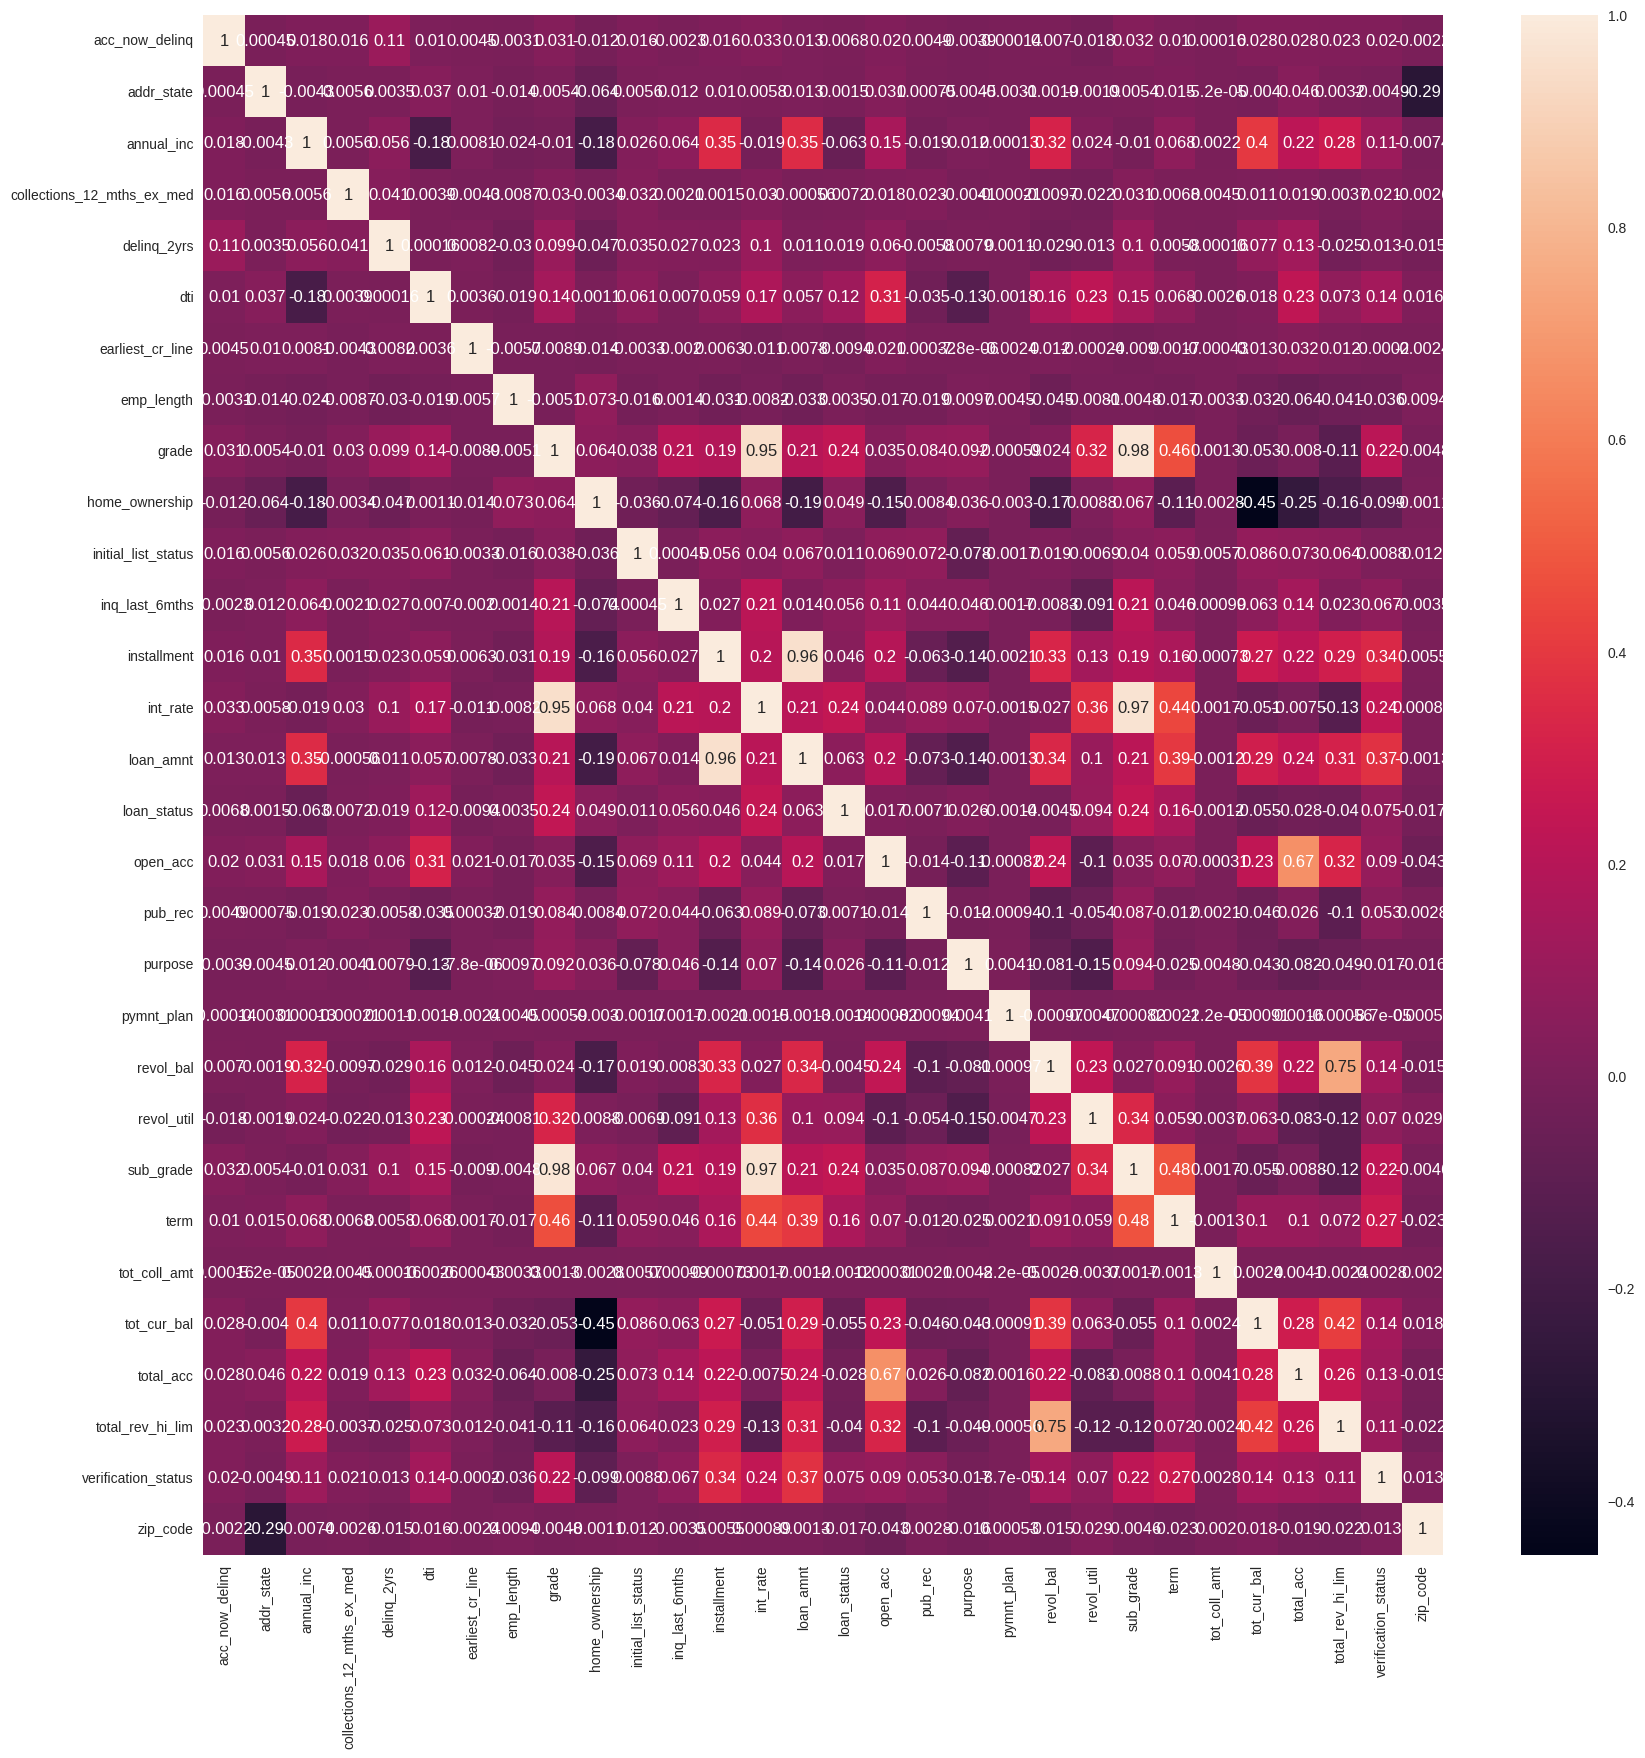

In [67]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True)

## 3.8. Assign Features and Target, Train-Test Split

In [68]:
X = df.drop(columns=['loan_status'])
y = df['loan_status']

In [69]:
scaler= StandardScaler()
X= scaler.fit_transform(X)

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [71]:
y_train.value_counts()

0    147757
1     34014
Name: loan_status, dtype: int64

In [72]:
print("Before oversampling: ", Counter(y_train))

smote = SMOTE()
X_train,y_train= smote.fit_resample(X_train,y_train)

print("After oversampling: ",Counter(y_train))

Before oversampling:  Counter({0: 147757, 1: 34014})
After oversampling:  Counter({0: 147757, 1: 147757})


# **4. MODELING**

In [ ]:
s = setup(X_train, target=y_train, session_id = 123, use_gpu=True)

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset migh

,Description,Value
0,Session id,123
1,Target,loan_status
2,Target type,Binary
3,Original data shape,"(295514, 30)"
4,Transformed data shape,"(295514, 30)"
5,Transformed train set shape,"(206859, 30)"
6,Transformed test set shape,"(88655, 30)"
7,Numeric features,29
8,Preprocess,True
9,Imputation type,simple


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset migh

In [ ]:
best = compare_models()

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,15:07:12
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Random Forest Classifier


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.8049,0.8049,0.8175,0.7974,0.8073,0.6098,0.6100,7.2290
knn,K Neighbors Classifier,0.7547,0.8713,0.9488,0.6835,0.7946,0.5094,0.5527,52.9510
lr,Logistic Regression,0.6544,0.7113,0.6589,0.6530,0.6559,0.3087,0.3088,2.7510
ridge,Ridge Classifier,0.6522,0.0000,0.6510,0.6526,0.6518,0.3044,0.3044,0.3940
svm,SVM - Linear Kernel,0.6495,0.0000,0.6403,0.6528,0.6458,0.2990,0.2996,2.1490
nb,Naive Bayes,0.5218,0.6979,0.9657,0.5161,0.6690,0.0437,0.0858,0.7180


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9063,0.9649,0.9027,0.9093,0.9060,0.8127,0.8127,52.9780
rf,Random Forest Classifier,0.8840,0.9460,0.8296,0.9308,0.8773,0.7679,0.7725,88.3580
lightgbm,Light Gradient Boosting Machine,0.8829,0.9328,0.7845,0.9768,0.8701,0.7658,0.7811,6.4750
gbc,Gradient Boosting Classifier,0.8467,0.9161,0.7893,0.8916,0.8373,0.6933,0.6979,144.7530
dt,Decision Tree Classifier,0.8049,0.8049,0.8175,0.7974,0.8073,0.6098,0.6100,7.2290
ada,Ada Boost Classifier,0.7813,0.8654,0.7513,0.7993,0.7745,0.5625,0.5636,29.7240
knn,K Neighbors Classifier,0.7547,0.8713,0.9488,0.6835,0.7946,0.5094,0.5527,52.9510
lr,Logistic Regression,0.6544,0.7113,0.6589,0.6530,0.6559,0.3087,0.3088,2.7510
ridge,Ridge Classifier,0.6522,0.0000,0.6510,0.6526,0.6518,0.3044,0.3044,0.3940
lda,Linear Discriminant Analysis,0.6522,0.7086,0.6510,0.6526,0.6518,0.3044,0.3044,1.6900


In [ ]:
best

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False)

In [ ]:
xt = ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False)

In [ ]:
xt.fit(X_train, y_train)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False)

In [ ]:
print(classification_report(y_test, xt.predict(X_test)))

              precision    recall  f1-score   support

           0       0.83      0.94      0.89     36982
           1       0.42      0.18      0.25      8461

    accuracy                           0.80     45443
   macro avg       0.63      0.56      0.57     45443
weighted avg       0.76      0.80      0.77     45443



In [ ]:
dump(xt, "/content/drive/MyDrive/Data Science/Rakamin/IDX Partners Virtual Internship/extra_tree.joblib")

['/content/drive/MyDrive/Data Science/Rakamin/IDX Partners Virtual Internship/extra_tree.joblib']